# 5300 Final Notebook
## Idris Malik.257
### Dr. Furnstahl, Spring 2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#from IPython.display import image
#from scipy import linalg as LA 
#from scipy.optimize import fsolve

# Problem 1
## The Double Pendulum

### The Equations

#### 11.37: 

$ U(\phi_1, \phi_2) = (m_1 + m_2)  g  L_1  (1 - \cos(\phi_1)) + m_2 g L_2 (1-\cos(\phi_2)) $

#### 11.38:

$ T = (1/2) (m_1+m_2) L_1^2 \dot{\phi_1}^2 + m_2 L_1 L_2 \dot{\phi_1} \dot{\phi_2} \cos{(\phi_1-\phi_2)} + (1/2) m_2 L_2^2 \dot{\phi_2}^2 $

### We will use the Lagrangian equations of motion

$  dL/dy - d/dt [ dL/ d\dot{y}] = 0  $

In [9]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a DOUBLE pendulum using the notation from Taylor.
     
    Parameters
    ----------
    g : float
        the acceleration of objects due to Earth's gravitation field (at the surface)
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum
    mn: float
        mass on a pendulum, for pendulum number 'n'

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, g = 1, m1 = 1, m2 = 1, L1 = 1, L2 = 1
                ):
        self.g = g
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2

    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi1/dt dphi1_dot/dt dphi2/dt dphi2_dot/dt]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with 
            y[0] = phi1 and y[1] = phi1_dot
            y[2] = phi2 and y[3] = phi2_dot
 
        Returns
        -------
        
        """
        phi1, z1, phi2, z2 = y 

        c, s = np.cos(phi1-phi2), np.sin(phi1-phi2)

        denom = (self.m1 + self.m2 * s**2)

        phi1_dot = z1

        z1_dot = (self.m2 * self.g * np.sin(phi2) * c \
                    - self.m2 * s * (self.L1 * z1**2 * c + self.L2 * z2**2) \
                    - (self.m1 + self.m2) * self.g * np.sin(phi1) )  \
                    / (self.L1 * denom)
                 
        
        phi2_dot = z2

        z2_dot = ( (self.m1 + self.m2) * (self.L1 * z1**2 * s \
                        - self.g * np.sin(phi2) + self.g * np.sin(phi1) * c) \
                        + self.m2 * self.L2 * z2**2 * s * c) \
                        /(self.L2 * denom) 
                 
        
        return phi1_dot, z1_dot, phi2_dot, z2_dot

    def solve_ode(self, t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0, abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        For now use solve_ivp, other solvers are an option.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]),
                                y, t_eval = t_pts,
                                atol=abserr, rtol=relerr)
 
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot

    def getPotential(self, phi1, phi1_dot, phi2, phi2_dot):
        """This defines the Potential Energy of the DoublePendulum. 
        This is based on eq 11.37
        """
        U = (self.m1 + self.m2)*self.g*self.L1 * (1 - np.cos(phi_1)) + self.m2*self.g*self.L2 * (1-np.cos(phi_2))
        
        self.potential = U

        return U
    
    def getKinetic(self, phi1, phi1_dot, phi2, phi2_dot):
        """This defines the Kinetic Energy of the DoublePendulum, for use in the Lagrangian. 
        This is based on eq 11.38
        """
        T = (1/2)*(self.m1+self.m2)*(self.L1**2)*(phi_dot_1**2) + \
              self.m2*self.L1*self.L2*phi_dot_1*phi_dot_2* np.cos(phi_1-phi_2) + \
              (1/2)*self.m2*(self.L2**2)*(phi_dot_2**2)
        
        self.kinetic = T
        return T

    def calc_E(y):
        """ Return the total energy of the system 
        """

        p1, p1_dot, p2, p2_dot = y.T 

        Potential = self.getPotential(self, p1, p1_dot, p2, p2_dot)
        Kinetic = self.getKinetic(self, p1, p1_dot, p2, p2_dot)

        return Kinetic + Potential



    # Below is Old, maybe not useful. 

   
    
    def getLagrangian(self, phi_1, phi_2, phi_dot_1, phi_dot_2):
        Lagrangian = self.getKinetic(phi_1 = phi_1, phi_2 = phi_2, phi_dot_1 = phi_dot_1, phi_dot_2 = phi_dot_2) - self.getPotential(phi_1 = phi_1, phi_2 = phi_2, phi_dot_1 = phi_dot_1, phi_dot_2 = phi_dot_2)

        self.lagrangian = Lagrangian

        return Lagrangian


    # For now, we will compute the lagrangian equations of motion by hand. 
        

    

In [10]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [11]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [12]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
mass1 = 1.
mass2 = 1.
g = 1.

# Instantiate a pendulum 
dp1 = DoublePendulum(L1 = L1, L2 = L2, m1 = mass1, m2 = mass2, g = g)

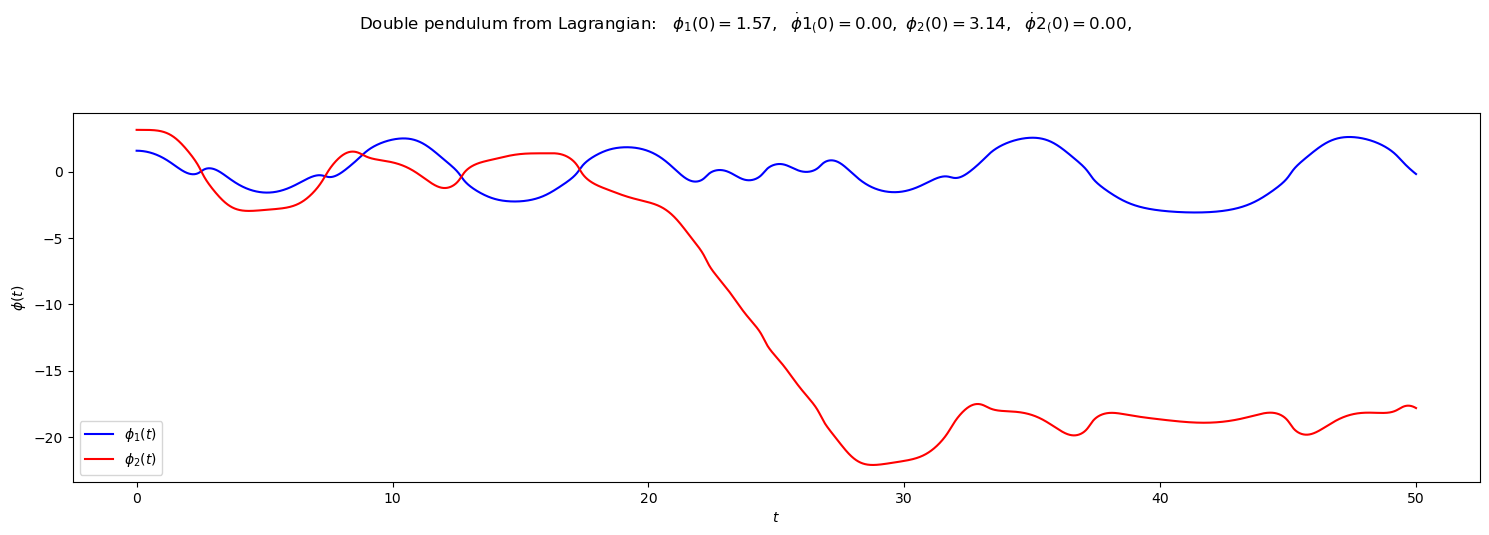

In [15]:
# both plots: same initial conditions
phi1_0 = np.pi/2
phi1_dot_0 = 0.

phi2_0 = np.pi
phi2_dot_0 = 0.

phi1, phi1_dot, phi2, phi2_dot = dp1.solve_ode(t_pts, phi1_0, phi1_dot_0, phi2_0, phi2_dot_0)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf' $\phi_1(0) = {phi1_0:.2f},$' + \
                rf'  $\dot\phi1_(0) = {phi1_dot_0:.2f},$' + \
                rf' $\phi_2(0) = {phi2_0:.2f},$' + \
                rf'  $\dot\phi2_(0) = {phi2_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=r'$\phi_1(t)$', 
            ax=ax_a)
  
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=r'$\phi_2(t)$', 
            ax=ax_a)

fig.tight_layout()
fig.savefig('double_pendulum_plot_1.png', bbox_inches='tight')          

In [ ]:
# second plot: phi_dot plot 
ax_b = fig.add_subplot(1,1,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_dot[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\dot\phi(t)$', 
            ax=ax_b)    

# third plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title='State space', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('simple_pendulum_Lagrange.png', bbox_inches='tight')  

In [ ]:
# OLD VERSION (Pre video)

class DoublePendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a pendulum using the notation from Taylor.
     
    Parameters
    ----------
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    beta : float
        coefficient of friction 
    gamma_ext : float
        amplitude of external force is gamma * omega_0**2 
    omega_ext : float
        frequency of external force 
    phi_ext : float
        phase angle for external force 

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    driving_force(t) 
        Returns the value of the external driving force at time t.
    """
    def __init__(self, g = 9.8, m1 = 1, m2 = 2, L1 = 1, L2 = 2,  phi_0_1 = 0, phi_0_2 = 0, phi_dot_0_1 = 0, phi_dot_0_2 = 0
                ):
        self.g = g
        self.m1 = m1
        self.m2 = m2
        self.L1 = L1
        self.L2 = L2
        self.phi_0_1 = phi_0_1
        self.phi_0_2 = phi_0_2
        self.phi_dot_0_1 = phi_dot_0_1
        self.phi_dot_0_2 = phi_dot_0_2
        # Let's see if I can instantiate empty energies
        self.potential = 0
        self.kinetic = 0
        self.lagrangian = 0
    
    # def dy_dt(self, y, t):
    #     """
    #     This function returns the right-hand side of the diffeq: 
    #     [dphi/dt d^2phi/dt^2]
        
    #     Parameters
    #     ----------
    #     y : float
    #         A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
    #     t : float
    #         time 
            
    #     Returns
    #     -------
        
    #     """
    #     F_ext = self.driving_force(t)
    #     return [y[1], -self.omega_0**2 * np.sin(y[0]) - 2.*self.beta * y[1] \
    #                    + F_ext]
    
    # def driving_force(self, t):
    #     """
    #     This function returns the value of the driving force at time t.
    #     """
    #     return self.gamma_ext * self.omega_0**2 \
    #                           * np.cos(self.omega_ext*t + self.phi_ext)  

    def getPotential(self, t, g, m1, m2, L1, L2, phi_1, phi_2, phi_0_1, phi_0_2, phi_dot_0_1, phi_dot_0_2):
        """This defines the Potential Energy of the DoublePendulum, for use in the Lagrangian. 
        This is based on eq 11.37
        """
        U = (m1 + m2)*g*L1 * (1 - np.cos(phi_1)) + m2*g*L2 * (1-np.cos(phi_2))
        
        self.potential = U

        return U
    
    def getKinetic(self, t, g, m1, m2, L1, L2, phi_1, phi_2, phi_dot_1, phi_dot_2, phi_0_1, phi_0_2, phi_dot_0_1, phi_dot_0_2):
        """This defines the Kinetic Energy of the DoublePendulum, for use in the Lagrangian. 
        This is based on eq 11.38
        """
        T = (1/2)*(m1+m2)*(L1**2)*(phi_dot_1**2) + m2*L1*L2*phi_dot_1*phi_dot_2* np.cos(phi_1-phi_2)+ (1/2)*m2*(L2**2)*(phi_dot_2**2)
        
        self.kinetic = T
        return T
    
    def getLagrangian(self, phi_1, phi_2, phi_dot_1, phi_dot_2):
        Lagrangian = self.getKinetic(phi_1 = phi_1, phi_2 = phi_2, phi_dot_1 = phi_dot_1, phi_dot_2 = phi_dot_2) - self.getPotential(phi_1 = phi_1, phi_2 = phi_2, phi_dot_1 = phi_dot_1, phi_dot_2 = phi_dot_2)

        self.lagrangian = Lagrangian

        return Lagrangian


    # For now, we will compute the lagrangian equations of motion by hand. 
    def get_dL_dy(self):
        

    # FISH
    def solve_ode(self, phi_0, phi_dot_0, abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0, phi_dot_0]  
        phi, phi_dot = odeint(self.dy_dt, y, t_pts, 
                              atol=abserr, rtol=relerr).T
        return phi, phi_dot

IndentationError: expected an indented block after function definition on line 98 (2745512685.py, line 102)

In [ ]:
class CoupledOscillators:
    """
    Solve the equations for linear coupled oscillators in matrix formulation.
    """
    
    def __init__(self, M_matrix, K_matrix, b_matrix=np.zeros(1)):
        self.M_matrix = M_matrix
        self.K_matrix = K_matrix
        self.q_len = len(self.M_matrix)
        if b_matrix.any():
            self.b_matrix = b_matrix
        else:    
            self.b_matrix = np.zeros((self.q_len)) 
        self.full_matrix = np.zeros((self.q_len, self.q_len))
        
            
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dq_vec/dt d^2q_vec/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            vector with y[:q_len] = q_vec, y[q_len:] = dqvec/dt
            
        """
        dy_dt_vec = np.zeros(2*self.q_len)   # Initialize to twice q_vec size
        # Set the upper half [:self.q_len] of dy_dt to the lower half of y
        dy_dt_vec[:self.q_len] = y[self.q_len:]  
        # Set the lower half [self.q_len:] of dy_dt to the vector that
        #  results from M^{-1} K y where @ is matrix multiplication
        dy_dt_vec[self.q_len:] = -1.* LA.inv(self.M_matrix) @ \
                    ( self.K_matrix @ y[:self.q_len] + \
                      self.b_matrix @ y[self.q_len:] )
        return dy_dt_vec
    
    
    def solve_ode(self, t_pts, q_vec_0, q_vec_dot_0,
                  method='RK45',
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Use solve_ivp with the option of specifying the method.
        Specify smaller abserr and relerr to get more precision.
        """
        y = np.concatenate((q_vec_0, q_vec_dot_0))
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, method=method, 
                             atol=abserr, rtol=relerr)
        q_vec, q_vec_dot = np.array_split(solution.y, 2)
        return q_vec, q_vec_dot
    

    def find_eigenmodes(self):
        """
        Find the normal modes.
        """
        eig_vals, eig_vecs = LA.eigh(K_matrix, M_matrix)
        self.frequencies = np.sqrt(eig_vals)
        return eig_vals, eig_vecs
    
    def plot_eigenmodes(self, t_pts, output_file=None):
        """
        plot the normal modes separately
        """
        from itertools import cycle
        colors = ['blue', 'green', 'red', 'purple']

        eig_vals, eig_vecs = self.find_eigenmodes()
        for i in np.arange(self.q_len): 
            q_vec_0 = eig_vecs[:,i]   # this is the i'th eigenvector
            q_vec_dot_0 = np.zeros(self.q_len)  # start with all qdots = 0
            q_vec, q_vec_dot = self.solve_ode(t_pts, q_vec_0, q_vec_dot_0)
             
            fig, axes = plt.subplots(self.q_len, 1, 
                                     figsize=(10, 2.*self.q_len))
            color_list = cycle(colors)
            for j in np.arange(self.q_len):
               axes[j].plot(t_pts, q_vec[j], color=next(color_list))
               axes[j].set_xlabel(r'$t$')
               axes[j].set_ylabel(fr'$q_{j+1:d}$')
               axes[j].axvline(2.*np.pi/np.sqrt(eig_vals[i]), 
                               color='black', linestyle=':')
            overall_title = fr'Normal mode {i+1:d}, ' + \
                            fr'$\omega = {self.frequencies[i]:.2f}$' 
            fig.suptitle(overall_title, va='center')
            fig.tight_layout()
            if output_file:
                 output_file_name = output_file.replace('.', f'_{i:d}.', 1)
                 fig.savefig(output_file_name, dpi=200, bbox_inches='tight')

In [ ]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [ ]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line